# Set up 

In [5]:
import pylab
pylab.rcParams['xtick.major.pad']='8'
pylab.rcParams['ytick.major.pad']='8'
#pylab.rcParams['font.sans-serif']='Arial'

from matplotlib import rc
rc('font', family='sans-serif')
rc('font', size=10.0)
rc('text', usetex=False)


from matplotlib.font_manager import FontProperties

panel_label_font = FontProperties().copy()
panel_label_font.set_weight("bold")
panel_label_font.set_size(12.0)
panel_label_font.set_family("sans-serif")

ImportError: No module named pylab

In [14]:
from numpy import genfromtxt
blackouts = genfromtxt('blackouts.txt')#/10**3
words = genfromtxt('words.txt')
worm = genfromtxt('worm.txt')
worm = worm[worm>0]

### Figure 1

In [8]:
def plot_basics(data, data_inst, fig, units):
    from powerlaw import plot_pdf, Fit, pdf
    annotate_coord = (-.4, .95)
    ax1 = fig.add_subplot(n_graphs,n_data,data_inst)
    x, y = pdf(data, linear_bins=True)
    ind = y>0
    y = y[ind]
    x = x[:-1]
    x = x[ind]
    ax1.scatter(x, y, color='r', s=.5)
    plot_pdf(data[data>0], ax=ax1, color='b', linewidth=2)
    from pylab import setp
    setp( ax1.get_xticklabels(), visible=False)

    if data_inst==1:
        ax1.annotate("A", annotate_coord, xycoords="axes fraction", fontproperties=panel_label_font)

    
    from mpl_toolkits.axes_grid.inset_locator import inset_axes
    ax1in = inset_axes(ax1, width = "30%", height = "30%", loc=3)
    ax1in.hist(data, normed=True, color='b')
    ax1in.set_xticks([])
    ax1in.set_yticks([])

    
    ax2 = fig.add_subplot(n_graphs,n_data,n_data+data_inst, sharex=ax1)
    plot_pdf(data, ax=ax2, color='b', linewidth=2)
    fit = Fit(data, xmin=1, discrete=True)
    fit.power_law.plot_pdf(ax=ax2, linestyle=':', color='g')
    p = fit.power_law.pdf()

    ax2.set_xlim(ax1.get_xlim())
    
    fit = Fit(data, discrete=True)
    fit.power_law.plot_pdf(ax=ax2, linestyle='--', color='g')
    from pylab import setp
    setp( ax2.get_xticklabels(), visible=False)

    if data_inst==1:
       ax2.annotate("B", annotate_coord, xycoords="axes fraction", fontproperties=panel_label_font)        
       ax2.set_ylabel(u"p(X)")# (10^n)")
        
    ax3 = fig.add_subplot(n_graphs,n_data,n_data*2+data_inst)#, sharex=ax1)#, sharey=ax2)
    fit.power_law.plot_pdf(ax=ax3, linestyle='--', color='g')
    fit.exponential.plot_pdf(ax=ax3, linestyle='--', color='r')
    fit.plot_pdf(ax=ax3, color='b', linewidth=2)
    
    ax3.set_ylim(ax2.get_ylim())
    ax3.set_xlim(ax1.get_xlim())
    
    if data_inst==1:
        ax3.annotate("C", annotate_coord, xycoords="axes fraction", fontproperties=panel_label_font)

    ax3.set_xlabel(units)

In [9]:
n_data = 3
n_graphs = 4
f = figure(figsize=(8,11))

data = words
data_inst = 1
units = 'Word Frequency'
plot_basics(data, data_inst, f, units)

data_inst = 2
#data = city
#units = 'City Population'
data = worm
units = 'Neuron Connections'
plot_basics(data, data_inst, f, units)

data = blackouts
data_inst = 3
units = 'Population Affected\nby Blackouts'
plot_basics(data, data_inst, f, units)

f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.3, hspace=.2)
figname = 'FigWorkflow'
f.savefig(figname+'.eps', bbox_inches='tight')
#f.savefig(figname+'.tiff', bbox_inches='tight', dpi=300)

NameError: name 'figure' is not defined

In [10]:
blackouts = blackouts/10**3

# Introduction

In [15]:
import powerlaw
fit = powerlaw.Fit(data)
fit.power_law.alpha
fit.power_law.sigma
fit.distribution_compare('power_law', 'exponential')

ImportError: No module named powerlaw

# Basic Methods

## Visualization

### PDF Linear vs Logarithmic Bins

In [16]:
data = words
####
figPDF = powerlaw.plot_pdf(data, color='b')
powerlaw.plot_pdf(data, linear_bins=True, color='r', ax=figPDF)
####
figPDF.set_ylabel("p(X)")
figPDF.set_xlabel(r"Word Frequency")
figname = 'FigPDF'
savefig(figname+'.eps', bbox_inches='tight')
#savefig(figname+'.tiff', bbox_inches='tight', dpi=300)

NameError: name 'powerlaw' is not defined

### Figure 2

In [4]:
data = words
fit = powerlaw.Fit(data, discrete=True)
####
figCCDF = fit.plot_pdf(color='b', linewidth=2)
fit.power_law.plot_pdf(color='b', linestyle='--', ax=figCCDF)
fit.plot_ccdf(color='r', linewidth=2, ax=figCCDF)
fit.power_law.plot_ccdf(color='r', linestyle='--', ax=figCCDF)
####
figCCDF.set_ylabel(u"p(X),  p(X≥x)")
figCCDF.set_xlabel(r"Word Frequency")

figname = 'FigCCDF'
savefig(figname+'.eps', bbox_inches='tight')
#savefig(figname+'.tiff', bbox_inches='tight', dpi=300)

NameError: name 'words' is not defined

In [11]:
data = blackouts
fit = powerlaw.Fit(data)
###
x, y = fit.cdf()
bin_edges, probability = fit.pdf()
y = fit.lognormal.cdf(data=[300,350])
y = fit.lognormal.pdf()

Calculating best minimal value for power law fit


## Identifying the Scaling Range

In [12]:
data = blackouts
####
import powerlaw
fit = powerlaw.Fit(data)
fit.xmin
fit.fixed_xmin
fit.alpha
fit.D
fit = powerlaw.Fit(data, xmin=1.0)
fit.xmin
fit.fixed_xmin
fit.alpha
fit.D

ImportError: No module named powerlaw

In [13]:
data = blackouts
####
fit = powerlaw.Fit(data, xmin=(250.0, 300.0))
fit.fixed_xmin
fit.given_xmin
fit.xmin

Calculating best minimal value for power law fit


272.0

In [14]:
data = blackouts
fit = powerlaw.Fit(data)
####
fit = powerlaw.Fit(data, xmax=10000.0)
fit.xmax
fit.fixed_xmax

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


True

### Figure 3

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


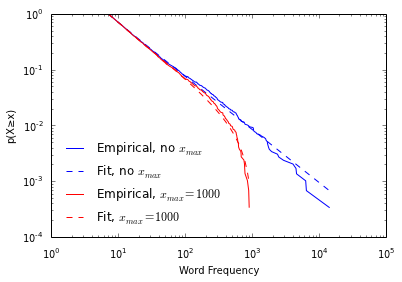

In [15]:
data = words
#FigCCDFmax = powerlaw.plot_ccdf(data, linewidth=3)
fit = powerlaw.Fit(data, discrete=True, xmax=None)
FigCCDFmax = fit.plot_ccdf(color='b', label=r"Empirical, no $x_{max}$")
fit.power_law.plot_ccdf(color='b', linestyle='--', ax=FigCCDFmax, label=r"Fit, no $x_{max}$")
fit = powerlaw.Fit(data, discrete=True, xmax=1000)
fit.plot_ccdf(color='r', label=r"Empirical, $x_{max}=1000$")
fit.power_law.plot_ccdf(color='r', linestyle='--', ax=FigCCDFmax, label=r"Fit, $x_{max}=1000$")
#x, y = powerlaw.ccdf(data, xmax=max(data))
#fig1.plot(x,y)
####
#FigCCDFmax.set_ylabel(r"$p(X\geq x)$")
FigCCDFmax.set_ylabel(u"p(X≥x)")
FigCCDFmax.set_xlabel(r"Word Frequency")
handles, labels = FigCCDFmax.get_legend_handles_labels()
leg = FigCCDFmax.legend(handles, labels, loc=3)
leg.draw_frame(False)

figname = 'FigCCDFmax'
savefig(figname+'.eps', bbox_inches='tight')
#savefig(figname+'.tiff', bbox_inches='tight', dpi=300)

## Continuous vs. Discrete Data

In [16]:
data = blackouts
fit = powerlaw.Fit(data)
####
fit = powerlaw.Fit(data, xmin=230.0)
fit.discrete
fit = powerlaw.Fit(data, xmin=230.0, discrete=True)
fit.discrete 

Calculating best minimal value for power law fit


True

# Comparing Candidate Distributions

In [17]:
data = blackouts
fit = powerlaw.Fit(data)
####
fit.power_law
fit.power_law.alpha
fit.power_law.parameter1
fit.power_law.parameter1_name
fit.lognormal.mu
fit.lognormal.parameter1_name
fit.lognormal.parameter2_name
fit.lognormal.parameter3_name == None

Calculating best minimal value for power law fit


True

In [18]:
data = blackouts
####
fit = powerlaw.Fit(data)
R, p = fit.distribution_compare('power_law', 'exponential', normalized_ratio=True)
print R, p

Calculating best minimal value for power law fit
1.43148048496 0.152292556044


## Generative Mechanisms

In [19]:
data = worm
fit = powerlaw.Fit(data, discrete=True)
####
fit.distribution_compare('power_law', 'exponential')
fit.distribution_compare('power_law', 'truncated_power_law')

Calculating best minimal value for power law fit
Assuming nested distributions


(-0.070651754953295454, 0.70698857057710152)

In [20]:
data = worm
fit = powerlaw.Fit(data, discrete=True)
####
fit.distribution_compare('power_law', 'exponential')
fit.distribution_compare('power_law', 'truncated_power_law')

Calculating best minimal value for power law fit
Assuming nested distributions


(-0.070651754953295454, 0.70698857057710152)

In [21]:
data = words
fit = powerlaw.Fit(data, discrete=True)
####
print fit.distribution_compare('power_law', 'exponential', normalized_ratio=True)
print fit.distribution_compare('power_law', 'truncated_power_law')

Calculating best minimal value for power law fit
(9.1359147187770002, 6.4856142413795328e-20)
Assuming nested distributions
(-0.91712308337346782, 0.17562683168707593)


In [22]:
print fit.distribution_compare('power_law', 'truncated_power_law')

Assuming nested distributions
(-0.91712308337346782, 0.17562683168707593)


### Figure 4

Calculating best minimal value for power law fit


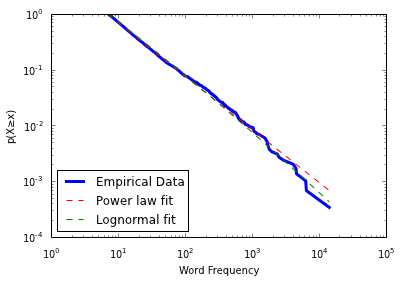

In [23]:
data = words
fit = powerlaw.Fit(data, discrete=True)
####
fit.distribution_compare('power_law', 'lognormal')
fig = fit.plot_ccdf(linewidth=3, label='Empirical Data')
fit.power_law.plot_ccdf(ax=fig, color='r', linestyle='--', label='Power law fit')
fit.lognormal.plot_ccdf(ax=fig, color='g', linestyle='--', label='Lognormal fit')
####
fig.set_ylabel(u"p(X≥x)")
fig.set_xlabel("Word Frequency")
handles, labels = fig.get_legend_handles_labels()
fig.legend(handles, labels, loc=3)

figname = 'FigLognormal'
savefig(figname+'.eps', bbox_inches='tight')
#savefig(figname+'.tiff', bbox_inches='tight', dpi=300)

# Creating Simulated Data

In [24]:
empirical_data = blackouts
####
fit = powerlaw.Fit(empirical_data)
simulated_data = fit.power_law.generate_random(10000)

theoretical_distribution = powerlaw.Power_Law(xmin=5.0, parameters=[2.5])
simulated_data = theoretical_distribution.generate_random(10000)

Calculating best minimal value for power law fit


In [25]:
theoretical_distribution = powerlaw.Power_Law(xmin=5.0, parameters=[2.5])
simulated_data = theoretical_distribution.generate_random(10000)
####
fit = powerlaw.Fit(simulated_data)
fit.power_law.xmin, fit.power_law.alpha

Calculating best minimal value for power law fit


(5.6152059101066776, 2.5169721295788654)

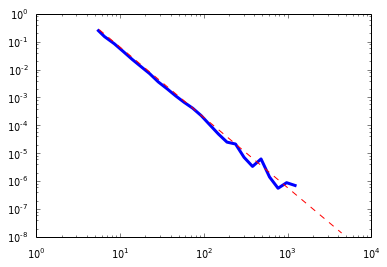

In [26]:
powerlaw.plot_pdf(simulated_data,linewidth=3)
fit.power_law.plot_pdf(simulated_data,linestyle='--',color='r')

#Advanced Considerations

## Discrete Distribution Calculation and Estimation

In [27]:
data = blackouts
####
fit = powerlaw.Fit(data, discrete=True, estimate_discrete=True)
fit.power_law.alpha
fit.power_law.estimate_discrete
fit = powerlaw.Fit(data, discrete=True, estimate_discrete=False)
fit.power_law.alpha
fit.power_law.estimate_discrete

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


False

In [28]:
data = blackouts
####
fit = powerlaw.Fit(data, discrete=True, xmin=230.0, xmax=9000, discrete_approximation='xmax')
fit.lognormal.mu
fit = powerlaw.Fit(data, discrete_approximation=100000, xmin=230.0, discrete=True)
fit.lognormal.mu
fit = powerlaw.Fit(data, discrete_approximation='round', xmin=230.0, discrete=True)
fit.lognormal.mu

0.39905257607693184

In [29]:
theoretical_distribution = powerlaw.Power_Law(xmin=5.0, parameters=[2.5], discrete=True)
simulated_data = theoretical_distribution.generate_random(10000, estimate_discrete=True)

In [30]:
empirical_data = blackouts
####
theoretical_distributionibution = powerlaw.Power_Law(xmin=5.0, parameters=[2.5], discrete=True, estimate_discrete=False)
simulated_data = theoretical_distribution.generate_random(10000)

fit = powerlaw.Fit(empirical_data, discrete=True, estimate_discrete=True)
simulated_data = fit.power_law.generate_random(10000)

Calculating best minimal value for power law fit


## Nested Distributions

In [31]:
data = blackouts
fit = powerlaw.Fit(data)
####
fit.distribution_compare('power_law', 'truncated_power_law')
fit.distribution_compare('exponential', 'stretched_exponential')

Calculating best minimal value for power law fit
Assuming nested distributions
Assuming nested distributions


(-13.018342321459157, 3.3499122220614908e-07)

## Restricted Parameter Range

In [32]:
data = blackouts
####
fit = powerlaw.Fit(data)
fit.power_law.alpha, fit.power_law.sigma, fit.xmin

fit = powerlaw.Fit(data, sigma_threshold=.1)
fit.power_law.alpha, fit.power_law.sigma, fit.xmin

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


(1.7831398653341155, 0.063521030949327109, 50.0)

In [33]:
parameter_range = {'alpha': [2.3, None], 'sigma': [None, .2]}
fit = powerlaw.Fit(data, parameter_range=parameter_range)
fit.power_law.alpha, fit.power_law.sigma, fit.xmin

Calculating best minimal value for power law fit


(2.3000107113942141, 0.17069976919260452, 234.0)

In [34]:
parameter_range = lambda(self): self.sigma/self.alpha < .05
fit = powerlaw.Fit(data, parameter_range=parameter_range)
fit.power_law.alpha, fit.power_law.sigma, fit.xmin

Calculating best minimal value for power law fit


(1.8833765811180314, 0.094168259953067143, 124.0)

## Multiple Possible Fits

### Figure 5

Calculating best minimal value for power law fit
50.0 0.0998297854528 1.78313986533
Calculating best minimal value for power law fit
230.0 0.0606737962944 2.27263721983


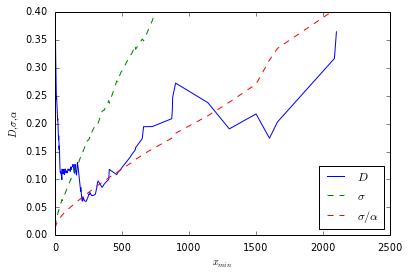

In [35]:
data = blackouts
fit = powerlaw.Fit(data, sigma_threshold=.1)
print fit.xmin, fit.D, fit.alpha
fit = powerlaw.Fit(data)
print fit.xmin, fit.D, fit.alpha
####
from matplotlib.pylab import plot
plot(fit.xmins, fit.Ds, label=r'$D$')
plot(fit.xmins, fit.sigmas, label=r'$\sigma$', linestyle='--')
plot(fit.xmins, fit.sigmas/fit.alphas, label=r'$\sigma /\alpha$', linestyle='--')
####
ylim(0, .4)
legend(loc=4)
xlabel(r'$x_{min}$')
ylabel(r'$D,\sigma,\alpha$')

figname = 'FigD'
savefig(figname+'.eps', bbox_inches='tight')
#savefig(figname+'.tiff', bbox_inches='tight', dpi=300)

## No Possible Fits

In [36]:
data = blackouts
####
fit = powerlaw.Fit(data, sigma_threshold=.001)
fit.power_law.alpha, fit.power_law.sigma, fit.xmin, fit.noise_flag

Calculating best minimal value for power law fit
No valid fits found.


(2.2726372198302882, 0.16568325372336856, 230.0, True)

In [37]:
fit.lognormal.mu, fit.lognormal.sigma
range_dict = {'mu': [10.5, None]}
fit.lognormal.parameter_range(range_dict)
fit.lognormal.mu, fit.lognormal.sigma, fit.lognormal.noise_flag

initial_parameters = (12, .7)
fit.lognormal.parameter_range(range_dict, initial_parameters)
fit.lognormal.mu, fit.lognormal.sigma, fit.lognormal.noise_flag

No valid fits found.


(10.500000000422041, 5.1423189016918585, False)

## Selecting x<sub>min</sub> with Other Distance Metrics

In [38]:
data = blackouts
####
fit = powerlaw.Fit(data, xmin_distance='D')
print fit.xmin, fit.power_law.alpha, fit.D
fit = powerlaw.Fit(data, xmin_distance='V')
print fit.xmin, fit.power_law.alpha, fit.V
fit = powerlaw.Fit(data, xmin_distance='Asquare')
print fit.xmin, fit.power_law.alpha, fit.Asquare

Calculating best minimal value for power law fit
230.0 2.27263721983 0.0606737962944
Calculating best minimal value for power law fit
219.0 2.21822784881 0.0921084614746
Calculating best minimal value for power law fit
230.0 2.27263721983 0.265613512591


# Supporting Information

In [39]:
from numpy import logspace
from scipy.stats import variation
import pandas as pd

def validate(xmin, alpha, discrete='continuous', n_data=10000, n_trials=1):
    
    if n_trials>1:
        return array([validate(xmin, alpha, discrete=discrete, n_data=n_data, n_trials=1) for trial in arange(n_trials)]).T
        
    if discrete=='continuous':
        discrete = False
        estimate_discrete = False
    elif discrete == 'discrete':
        discrete = True
        estimate_discrete = False
    elif discrete == 'discrete_estimate':
        discrete = True
        estimate_discrete = True

    theoretical_distribution = powerlaw.Power_Law(xmin=xmin, parameters=[alpha], discrete=discrete)
    simulated_data = theoretical_distribution.generate_random(n_data, estimate_discrete=estimate_discrete)
    fit = powerlaw.Fit(simulated_data, discrete=discrete, estimate_discrete=estimate_discrete)
    return fit.xmin, fit.alpha

In [40]:
n_trials = 10
n_data = 10000
theoretical_xmins = unique(floor(logspace(0.0,2.0,num=20)))
theoretical_alphas = array([1.5,2.0,2.5,3.0,3.5])
distribution_types = ['continuous','discrete']

filename = 'powerlaw_validation_%itrials_%idata.h5'%(int(n_trials),int(n_data))

from os import listdir
files = listdir('.')
if filename in files:
    df = pd.read_hdf(filename,'df')
else:
    print("Calculating validation fits on %i synthetic datasets of %i data points each. "
          "Could take a long time.")%(n_trials*len(theoretical_alphas)*len(theoretical_xmins)*len(distribution_types), n_data) 

    ind = [(d,a,x) for d in distribution_types for a in theoretical_alphas for x in theoretical_xmins]
    ind = pd.MultiIndex.from_tuples(ind, names=['type', 'alpha','xmin'])
    df = pd.DataFrame(columns=['alpha_mean', 'alpha_sd', 'xmin_mean', 'xmin_sd'], index=ind)
    
    i = 0
    for dt, alpha, xmin in ind:
        i += 1
        print(i)
        data = validate(xmin, alpha, discrete=dt, n_data=n_data, n_trials=n_trials)
        df.ix[dt,alpha,xmin] = (mean(data[1]), std(data[1]), mean(data[0]), std(data[0]))

    df.to_hdf(filename,'df')

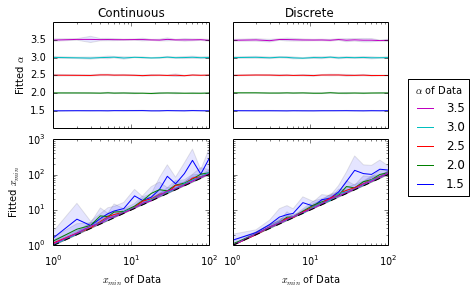

In [41]:
subplot(2,2,1)
for a in theoretical_alphas:
    y_vals = df.ix['continuous', a]['alpha_mean'].astype('float')
    error = df.ix['continuous', a]['alpha_sd'].astype('float')

    plot(theoretical_xmins, y_vals, label=a)
    fill_between(theoretical_xmins, y_vals-error, y_vals+error, alpha=.1)

xscale('log')
#xlabel(r"$x_{min}$")
ylabel(r"Fitted $\alpha$")
yticks(theoretical_alphas)
setp(gca().get_xticklabels(), visible=False)
title("Continuous")

#########
subplot(2,2,2)
for a in theoretical_alphas:
    y_vals = df.ix['discrete', a]['alpha_mean'].astype('float')
    error = df.ix['discrete', a]['alpha_sd'].astype('float')

    plot(theoretical_xmins, y_vals, label=a)
    fill_between(theoretical_xmins, y_vals-error, y_vals+error, alpha=.1)

xscale('log')
#xlabel(r"$x_{min}$")
#ylabel(r"Fitted $\alpha$")
setp(gca().get_xticklabels(), visible=False)
setp(gca().get_yticklabels(), visible=False)
title("Discrete")

########
subplot(2,2,3)
for a in theoretical_alphas:
    y_vals = df.ix['continuous', a]['xmin_mean'].astype('float')
    error = df.ix['continuous', a]['xmin_sd'].astype('float')
    up = y_vals+error
    down = y_vals-error
    ind = down<theoretical_xmins
    down[ind] = theoretical_xmins[ind]
    
    plot(theoretical_xmins, y_vals, label=a)
    fill_between(theoretical_xmins, down, up, alpha=.1)

xlim(xmin=1)
ylim(ymin=1)
plot(xlim(),xlim(),linestyle='--', color='k')
xscale('log')
yscale('log')
xlabel(r"$x_{min}$ of Data")
ylabel(r"Fitted $x_{min}$")


########
legend_refs = []
########
subplot(2,2,4,sharey=gca())
for a in theoretical_alphas:
    y_vals = df.ix['discrete', a]['xmin_mean'].astype('float')
    error = df.ix['discrete', a]['xmin_sd'].astype('float')
    up = y_vals+error
    down = y_vals-error
    ind = down<theoretical_xmins
    down[ind] = theoretical_xmins[ind]

    line = plot(theoretical_xmins, y_vals, label=a)
    legend_refs += line
    fill_between(theoretical_xmins, down, up, alpha=.1)

xlim(xmin=1)
ylim(ymin=1)
plot(xlim(),xlim(),linestyle='--', color='k')
xscale('log')
yscale('log')
xlabel(r"$x_{min}$ of Data")
#ylabel(r"Fitted $x_{min}$")
setp(gca().get_yticklabels(), visible=False)


#######
#figlegend(legend_refs[::-1], theoretical_alphas[::-1],'center right', title=r'$\alpha$ of Data')
subplots_adjust(wspace=.15, hspace=.1)
legend( legend_refs[::-1], theoretical_alphas[::-1], loc = 'center right', bbox_to_anchor = (.1,0,1,1),
            bbox_transform = plt.gcf().transFigure, title=r'$\alpha$ of Data' )
savefig('Fig_powerlaw_validation_%itrials_%idata.pdf'%(int(n_trials),int(n_data)), bbox_inches='tight')
savefig('Fig_powerlaw_validation_%itrials_%idata.tiff'%(int(n_trials),int(n_data)), bbox_inches='tight', dpi=300)